In [1]:
from bs4 import BeautifulSoup
import requests
import re
import os
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
import seaborn as sns 

### Table from website

In [2]:
table ='''CASES	PER 100,000	DEATHS	PER 100,000 
11368, Queens
Corona
4,479	4,014	392	351
10467, Bronx
Norwood and Olinville
3,334	3,308	292	290
11373, Queens
Elmhurst
3,194	3,439	285	307
11219, Brooklyn
Borough Park
3,025	3,258	210	226
10469, Bronx
Allerton, Pelham Gardens and Baychester 
2,976	4,162	321	449
10468, Bronx
Kingsbridge Heights
2,724	3,552	198	258
11236, Brooklyn
Canarsie
2,684	2,771	275	284
10314, Staten Island
Mid-Island
2,613	2,877	182	200
11372, Queens
Jackson Heights
2,490	3,980	231	369
10456, Bronx
Claremont Village and Morrisania
2,462	2,635	267	286
10466, Bronx
Wakefield, Edenwald and Eastchester
2,371	3,285	156	216
10452, Bronx
Highbridge
2,357	3,060	155	201
11208, Brooklyn
East New York
2,354	2,462	217	227
10453, Bronx
Morris Heights and University Heights 
2,331	2,871	158	195
11230, Brooklyn
Ocean Parkway and Midwood
2,329	2,612	203	228
11691, Queens
Edgemere, Bayswater and Far Rockaway
2,298	3,549	299	462
10462, Bronx
Bronxdale and Parkchester
2,249	2,908	163	211
11226, Brooklyn
Flatbush
2,235	2,256	258	260
11234, Brooklyn
Flatlands, Mill Basin and Bergen Beach
2,229	2,339	182	191
11377, Queens
Woodside
2,204	2,549	174	201
11385, Queens
Ridgewood and Glendale
2,134	2,073	119	116
10457, Bronx
 Mount Hope and East Tremont
2,066	2,766	173	232
11211, Brooklyn
Williamsburg
2,061	2,069	121	121
11434, Queens
South Jamaica and Rochdale Village
2,056	3,044	153	227
11207, Brooklyn
East New York
2,051	2,300	201	225
11203, Brooklyn
Wingate and East Flatbush
2,041	2,781	237	323
11235, Brooklyn
Brighton Beach, Manhattan Beach and Sheepshead Bay
2,023	2,543	271	341
10458, Bronx
Fordham, Belmont and Bedford Park 
2,022	2,413	112	134
11204, Brooklyn
Bensonhurst and Borough Park
2,014	2,539	135	170
10463, Bronx
Spuyten Duyvil, Marble Hill and Kingsbridge
1,987	2,787	190	267
10472, Bronx
Soundview and Unionport
1,939	2,855	172	253
10473, Bronx
Soundview, Castle Hill and Clason Point
1,910	3,084	121	195
10461, Bronx
Morris Park and Pelham Bay
1,861	3,761	135	273
11212, Brooklyn
Brownsville
1,846	2,319	214	269
10029, Manhattan
East Harlem
1,797	2,279	196	249
11432, Queens
Jamaica Hills and Jamaica Estates
1,781	2,818	225	356
11229, Brooklyn
Sheepshead Bay
1,754	2,066	136	160
11218, Brooklyn
Kensington and Windsor Terrace
1,704	2,248	131	173
11223, Brooklyn
Gravesend
1,694	2,119	135	169
10475, Bronx
Co-op City
1,691	3,866	161	368
11210, Brooklyn
Midwood and Flatbush
1,666	2,483	129	192
10460, Bronx
East Tremond and West Farms
1,618	2,693	113	188
11435, Queens
Briarwood and Jamaica
1,606	2,785	137	238
10451, Bronx
Concourse
1,595	3,343	146	306
11206, Brooklyn
East Williamsburg and Bed-Stuy
1,592	1,862	148	173
11369, Queens
East Elmhurst
1,589	4,358	160	439
11220, Brooklyn
Sunset Park
1,524	1,548	154	156
11214, Brooklyn
Bath Beach and Bensonhurst
1,520	1,629	173	185
10032, Manhattan
Washington Heights
1,500	2,439	159	259
11375, Queens
Forest Hills
1,491	2,113	177	251
10312, Staten Island
Arden Heights, Annadale and Eltingville
1,488	2,467	59	98
10459, Bronx
Longwood
1,475	3,050	154	318
10465, Bronx
Throgs Neck and Country Club
1,470	3,416	74	172
10306, Staten Island
Richmond Town, Oakwood and Grant City
1,434	2,671	75	140
11213, Brooklyn
Crown Heights
1,375	2,134	132	205
10304, Staten Island
Todt Hill, Fox Hills and Stapleton
1,372	3,232	163	384
11420, Queens
South Ozone Park
1,342	2,772	96	198
10033, Manhattan
Washington Heights
1,337	2,258	114	193
11370, Queens
Astoria Heights and East Elmhurst
1,319	4,026	50	153
10025, Manhattan
Upper West Side
1,312	1,421	161	174
11413, Queens
Brookville and Laurelton
1,304	2,988	66	151
10031, Manhattan
Hamilton Heights
1,302	2,150	118	195
11221, Brooklyn
Bed-Stuy and Bushwick
1,282	1,570	128	157
10455, Bronx
Melrose
1,260	2,988	96	228
11355, Queens
Flushing
1,256	1,570	146	182
11233, Brooklyn
Bed-Stuy and Ocean Hill
1,248	1,730	126	175
10305, Staten Island
Rosebank and Arrochar
1,227	2,883	74	174
11412, Queens
St. Albans
1,227	3,118	75	191
11419, Queens
Richmond Hill and South Ozone Park
1,183	2,327	86	169
11421, Queens
Woodhaven
1,182	2,800	94	223
10301, Staten Island
New Brighton and St. George
1,168	2,948	99	250
11354, Queens
Flushing and Murray Hill
1,161	2,091	261	470
11224, Brooklyn
Sea Gate and Coney Island
1,144	2,572	197	443
11225, Brooklyn
Prospect Lefferts Gardens
1,137	1,970	127	220
11209, Brooklyn
Fort Hamilton and Bay Ridge
1,121	1,671	106	158
10454, Bronx
Mott Haven and Port Morris
1,120	2,930	102	267
10040, Manhattan
Washington Heights
1,102	2,459	108	241
11418, Queens
Richmond Hill
1,073	2,816	92	241
11374, Queens
Rego Park
1,066	2,535	84	200
11423, Queens
Hollis
1,064	3,321	91	284
10002, Manhattan
Chinatown and Lower East Side
1,044	1,360	146	190
10027, Manhattan
Morningside Heights and Central Harlem
1,023	1,608	101	159
11367, Queens
Kew Gardens Hills
1,020	2,426	56	133
11422, Queens
Rosedale
964	2,859	41	122
11237, Brooklyn
Bushwick
960	1,894	109	215
10035, Manhattan
East Harlem
939	2,728	112	325
11433, Queens
Jamaica
935	2,595	72	200
11429, Queens
Queens Village
928	3,310	61	218
11417, Queens
Ozone Park
879	2,811	35	112
10303, Staten Island
Mariner\'s Harbor
860	3,278	41	156
10309, Staten Island
Rossville, Woodrow and Prince\'s Bay
835	2,530	30	91
11365, Queens
Pomonok and Fresh Meadows
825	1,873	57	129
11357, Queens
Whitestone
808	2,021	81	203
11414, Queens
Howard Beach
797	2,820	52	184
11379, Queens
Middle Village
794	2,194	82	227
10471, Bronx
Riverdale and Fieldston
781	3,676	68	320
11427, Queens
Bellaire
774	3,334	44	190
11238, Brooklyn
Clinton Hill and Prospect Heights
765	1,416	96	178
11378, Queens
Maspeth
729	2,107	65	188
11216, Brooklyn
Bed-Stuy and Crown Heights
725	1,305	65	117
11205, Brooklyn
Fort Greene and Clinton Hill
719	1,634	46	105
10310, Staten Island
West Brighton
715	2,995	33	138
11416, Queens
Ozone Park
704	2,645	50	188
10034, Manhattan
Inwood
703	1,632	68	158
11694, Queens
Belle Harbor and Rockaway Park
697	3,424	76	373
10009, Manhattan
East Village and Stuyvesant Town
688	1,171	65	111
11201, Brooklyn
Brooklyn Heights, Downtown and Dumbo
687	1,128	82	135
10024, Manhattan
Upper West Side
683	1,191	67	117
10016, Manhattan
Gramercy and Murray Hill
680	1,295	48	91
11411, Queens
Cambria Heights
677	3,303	36	176
11428, Queens
Queens Village
668	3,456	40	207
11228, Brooklyn
Dyker Heights
657	1,486	76	172
11106, Queens
Ravenswood
638	1,650	44	114
10026, Manhattan
Central Harlem
631	1,617	37	95
10302, Staten Island
Port Richmond
631	3,361	31	165
10308, Staten Island
Great Kills
630	2,126	25	84
10128, Manhattan
Upper East Side
628	1,024	36	59
11101, Queens
Long Island City
624	1,773	36	102
11215, Brooklyn
Gowanus and Park Slope
618	884	42	60
11217, Brooklyn
Boerum Hill and Park Slope
616	1,297	77	162
11102, Queens
Astoria
606	1,857	75	230
11692, Queens
Arverne
599	2,977	82	408
10019, Manhattan
Hell\'s Kitchen and Midtown
593	1,459	43	106
11004, Queens
Glen Oaks and Floral Park
574	3,060	57	304
11103, Queens
Astoria
569	1,555	48	131
11358, Queens
Murray Hill and Auburndale
563	1,584	35	98
10021, Manhattan
Upper East Side
559	1,265	61	138
10023, Manhattan
Upper West Side
557	924	52	86
11356, Queens
College Point
550	2,358	41	176
10037, Manhattan
Central Harlem
537	2,601	66	320
11415, Queens
Kew Gardens
528	2,745	43	224
11232, Brooklyn
Sunset Park and Greenwood Heights
521	1,843	40	141
10011, Manhattan
Chelsea
519	1,048	36	73
11436, Queens
South Jamaica
518	2,489	37	178
10039, Manhattan
Central Harlem
514	1,943	56	212
11239, Brooklyn
East New York
513	4,133	77	620
11426, Queens
Bellerose
496	2,436	29	142
10030, Manhattan
Central Harlem
493	1,681	48	164
11104, Queens
Sunnyside
489	1,974	34	137
11105, Queens
Steinway
487	1,357	42	117
10028, Manhattan
Upper East Side
466	948	29	59
11364, Queens
Oakland Gardens
461	1,334	25	72
10003, Manhattan
Greenwich Village and Flatiron
447	831	32	59
10470, Bronx
Woodlawn
447	3,169	14	99
11361, Queens
Bayside
445	1,591	40	143
11222, Brooklyn
Greenpoint
441	1,213	30	83
10075, Manhattan
Upper East Side
422	1,786	45	190
11231, Brooklyn
Red Hook and Carroll Gardens
421	1,138	33	89
10036, Manhattan
Hells Kitchen and Midtown
412	1,572	35	134
11366, Queens
Hillcrest and Fresh Meadows
385	2,794	22	160
10307, Staten Island
Tottenville
377	2,478	14	92
10001, Manhattan
Chelsea
363	1,541	21	89
10022, Manhattan
Midtown and Sutton Place
336	1,108	26	86
10065, Manhattan
Upper East Side
327	1,125	26	89
11693, Queens
Broad Channel and Rockaway Beach
326	2,633	25	202
10474, Bronx
Hunts Point
319	2,565	19	153
11360, Queens
Bay Terrace
311	1,649	16	85
11362, Queens
Douglaston and Little Neck
308	1,736	18	101
10014, Manhattan
West Village
298	960	24	77
10010, Manhattan
Flatiron and Gramercy
267	825	20	62
10013, Manhattan
Tribeca and Chinatown
259	892	20	69
10038, Manhattan
Financial District
248	1,125	27	122
10044, Manhattan
Roosevelt Island
234	2,000	33	282
10018, Manhattan
Hudson Yards and Midtown
203	2,130	3	31
10012, Manhattan
Greenwich Village and Soho
162	676	9	38
10017, Manhattan
Turtle Bay
143	887	6	37
10464, Bronx
City Island
118	2,711	7	161
11697, Queens
Breezy Point
108	3,054	3	85
11363, Queens
Douglaston and Little Neck
98	1,369	3	42
10282, Manhattan
Battery Park City
70	1,269	15	272
10005, Manhattan
Financial District
61	727	2	24
10007, Manhattan
Civic Center
54	655	3	36
10069, Manhattan
Upper West Side
54	852	2	32
10280, Manhattan
Battery Park City
50	520	—	—
10004, Manhattan
Financial District
31	849	1	27
10006, Manhattan
Financial District
24	694	—	—
'''

In [3]:
table = table.replace('\t', ',')
table1 = re.sub('\n(\D*\s?\D*?)', ',\\1', table)
table2 = re.sub('(\D*\s?\D*?)\n','\\1,',table1)
table3 = re.sub(',(\d{5})','\n\\1',table2)
re.sub(',(\d){1},(\d\d\d)',',\\1\\2',table3)

"CASES,PER 100,000,DEATHS,PER 100,000 \n11368, Queens,Corona,4479,4014,392,351\n10467, Bronx,Norwood and Olinville,3334,3308,292,290\n11373, Queens,Elmhurst,3194,3439,285,307\n11219, Brooklyn,Borough Park,3025,3258,210,226\n10469, Bronx,Allerton, Pelham Gardens and Baychester ,2976,4162,321,449\n10468, Bronx,Kingsbridge Heights,2724,3552,198,258\n11236, Brooklyn,Canarsie,2684,2771,275,284\n10314, Staten Island,Mid-Island,2613,2877,182,200\n11372, Queens,Jackson Heights,2490,3980,231,369\n10456, Bronx,Claremont Village and Morrisania,2462,2635,267,286\n10466, Bronx,Wakefield, Edenwald and Eastchester,2371,3285,156,216\n10452, Bronx,Highbridge,2357,3060,155,201\n11208, Brooklyn,East New York,2354,2462,217,227\n10453, Bronx,Morris Heights and University Heights ,2331,2871,158,195\n11230, Brooklyn,Ocean Parkway and Midwood,2329,2612,203,228\n11691, Queens,Edgemere, Bayswater and Far Rockaway,2298,3549,299,462\n10462, Bronx,Bronxdale and Parkchester,2249,2908,163,211\n11226, Brooklyn,Flatbu

In [4]:
final = '''\n11368, Queens,Corona,4479,4014,392,351\n10467, Bronx,Norwood and Olinville,3334,3308,292,290\n11373, Queens,Elmhurst,3194,3439,285,307\n11219, Brooklyn,Borough Park,3025,3258,210,226\n10469, Bronx,Allerton, Pelham Gardens and Baychester ,2976,4162,321,449\n10468, Bronx,Kingsbridge Heights,2724,3552,198,258\n11236, Brooklyn,Canarsie,2684,2771,275,284\n10314, Staten Island,Mid-Island,2613,2877,182,200\n11372, Queens,Jackson Heights,2490,3980,231,369\n10456, Bronx,Claremont Village and Morrisania,2462,2635,267,286\n10466, Bronx,Wakefield, Edenwald and Eastchester,2371,3285,156,216\n10452, Bronx,Highbridge,2357,3060,155,201\n11208, Brooklyn,East New York,2354,2462,217,227\n10453, Bronx,Morris Heights and University Heights ,2331,2871,158,195\n11230, Brooklyn,Ocean Parkway and Midwood,2329,2612,203,228\n11691, Queens,Edgemere, Bayswater and Far Rockaway,2298,3549,299,462\n10462, Bronx,Bronxdale and Parkchester,2249,2908,163,211\n11226, Brooklyn,Flatbush,2235,2256,258,260\n11234, Brooklyn,Flatlands, Mill Basin and Bergen Beach,2229,2339,182,191\n11377, Queens,Woodside,2204,2549,174,201\n11385, Queens,Ridgewood and Glendale,2134,2073,119,116\n10457, Bronx, Mount Hope and East Tremont,2066,2766,173,232\n11211, Brooklyn,Williamsburg,2061,2069,121,121\n11434, Queens,South Jamaica and Rochdale Village,2056,3044,153,227\n11207, Brooklyn,East New York,2051,2300,201,225\n11203, Brooklyn,Wingate and East Flatbush,2041,2781,237,323\n11235, Brooklyn,Brighton Beach, Manhattan Beach and Sheepshead Bay,2023,2543,271,341\n10458, Bronx,Fordham, Belmont and Bedford Park ,2022,2413,112,134\n11204, Brooklyn,Bensonhurst and Borough Park,2014,2539,135,170\n10463, Bronx,Spuyten Duyvil, Marble Hill and Kingsbridge,1987,2787,190,267\n10472, Bronx,Soundview and Unionport,1939,2855,172,253\n10473, Bronx,Soundview, Castle Hill and Clason Point,1910,3084,121,195\n10461, Bronx,Morris Park and Pelham Bay,1861,3761,135,273\n11212, Brooklyn,Brownsville,1846,2319,214,269\n10029, Manhattan,East Harlem,1797,2279,196,249\n11432, Queens,Jamaica Hills and Jamaica Estates,1781,2818,225,356\n11229, Brooklyn,Sheepshead Bay,1754,2066,136,160\n11218, Brooklyn,Kensington and Windsor Terrace,1704,2248,131,173\n11223, Brooklyn,Gravesend,1694,2119,135,169\n10475, Bronx,Co-op City,1691,3866,161,368\n11210, Brooklyn,Midwood and Flatbush,1666,2483,129,192\n10460, Bronx,East Tremond and West Farms,1618,2693,113,188\n11435, Queens,Briarwood and Jamaica,1606,2785,137,238\n10451, Bronx,Concourse,1595,3343,146,306\n11206, Brooklyn,East Williamsburg and Bed-Stuy,1592,1862,148,173\n11369, Queens,East Elmhurst,1589,4358,160,439\n11220, Brooklyn,Sunset Park,1524,1548,154,156\n11214, Brooklyn,Bath Beach and Bensonhurst,1520,1629,173,185\n10032, Manhattan,Washington Heights,1500,2439,159,259\n11375, Queens,Forest Hills,1491,2113,177,251\n10312, Staten Island,Arden Heights, Annadale and Eltingville,1488,2467,59,98\n10459, Bronx,Longwood,1475,3050,154,318\n10465, Bronx,Throgs Neck and Country Club,1470,3416,74,172\n10306, Staten Island,Richmond Town, Oakwood and Grant City,1434,2671,75,140\n11213, Brooklyn,Crown Heights,1375,2134,132,205\n10304, Staten Island,Todt Hill, Fox Hills and Stapleton,1372,3232,163,384\n11420, Queens,South Ozone Park,1342,2772,96,198\n10033, Manhattan,Washington Heights,1337,2258,114,193\n11370, Queens,Astoria Heights and East Elmhurst,1319,4026,50,153\n10025, Manhattan,Upper West Side,1312,1421,161,174\n11413, Queens,Brookville and Laurelton,1304,2988,66,151\n10031, Manhattan,Hamilton Heights,1302,2150,118,195\n11221, Brooklyn,Bed-Stuy and Bushwick,1282,1570,128,157\n10455, Bronx,Melrose,1260,2988,96,228\n11355, Queens,Flushing,1256,1570,146,182\n11233, Brooklyn,Bed-Stuy and Ocean Hill,1248,1730,126,175\n10305, Staten Island,Rosebank and Arrochar,1227,2883,74,174\n11412, Queens,St. Albans,1227,3118,75,191\n11419, Queens,Richmond Hill and South Ozone Park,1183,2327,86,169\n11421, Queens,Woodhaven,1182,2800,94,223\n10301, Staten Island,New Brighton and St. George,1168,2948,99,250\n11354, Queens,Flushing and Murray Hill,1161,2091,261,470\n11224, Brooklyn,Sea Gate and Coney Island,1144,2572,197,443\n11225, Brooklyn,Prospect Lefferts Gardens,1137,1970,127,220\n11209, Brooklyn,Fort Hamilton and Bay Ridge,1121,1671,106,158\n10454, Bronx,Mott Haven and Port Morris,1120,2930,102,267\n10040, Manhattan,Washington Heights,1102,2459,108,241\n11418, Queens,Richmond Hill,1073,2816,92,241\n11374, Queens,Rego Park,1066,2535,84,200\n11423, Queens,Hollis,1064,3321,91,284\n10002, Manhattan,Chinatown and Lower East Side,1044,1360,146,190\n10027, Manhattan,Morningside Heights and Central Harlem,1023,1608,101,159\n11367, Queens,Kew Gardens Hills,1020,2426,56,133\n11422, Queens,Rosedale,964,2859,41,122\n11237, Brooklyn,Bushwick,960,1894,109,215\n10035, Manhattan,East Harlem,939,2728,112,325\n11433, Queens,Jamaica,935,2595,72,200\n11429, Queens,Queens Village,928,3310,61,218\n11417, Queens,Ozone Park,879,2811,35,112\n10303, Staten Island,Mariner's Harbor,860,3278,41,156\n10309, Staten Island,Rossville, Woodrow and Prince's Bay,835,2530,30,91\n11365, Queens,Pomonok and Fresh Meadows,825,1873,57,129\n11357, Queens,Whitestone,808,2021,81,203\n11414, Queens,Howard Beach,797,2820,52,184\n11379, Queens,Middle Village,794,2194,82,227\n10471, Bronx,Riverdale and Fieldston,781,3676,68,320\n11427, Queens,Bellaire,774,3334,44,190\n11238, Brooklyn,Clinton Hill and Prospect Heights,765,1416,96,178\n11378, Queens,Maspeth,729,2107,65,188\n11216, Brooklyn,Bed-Stuy and Crown Heights,725,1305,65,117\n11205, Brooklyn,Fort Greene and Clinton Hill,719,1634,46,105\n10310, Staten Island,West Brighton,715,2995,33,138\n11416, Queens,Ozone Park,704,2645,50,188\n10034, Manhattan,Inwood,703,1632,68,158\n11694, Queens,Belle Harbor and Rockaway Park,697,3424,76,373\n10009, Manhattan,East Village and Stuyvesant Town,688,1171,65,111\n11201, Brooklyn,Brooklyn Heights, Downtown and Dumbo,687,1128,82,135\n10024, Manhattan,Upper West Side,683,1191,67,117\n10016, Manhattan,Gramercy and Murray Hill,680,1295,48,91\n11411, Queens,Cambria Heights,677,3303,36,176\n11428, Queens,Queens Village,668,3456,40,207\n11228, Brooklyn,Dyker Heights,657,1486,76,172\n11106, Queens,Ravenswood,638,1650,44,114\n10026, Manhattan,Central Harlem,631,1617,37,95\n10302, Staten Island,Port Richmond,631,3361,31,165\n10308, Staten Island,Great Kills,630,2126,25,84\n10128, Manhattan,Upper East Side,628,1024,36,59\n11101, Queens,Long Island City,624,1773,36,102\n11215, Brooklyn,Gowanus and Park Slope,618,884,42,60\n11217, Brooklyn,Boerum Hill and Park Slope,616,1297,77,162\n11102, Queens,Astoria,606,1857,75,230\n11692, Queens,Arverne,599,2977,82,408\n10019, Manhattan,Hell's Kitchen and Midtown,593,1459,43,106\n11004, Queens,Glen Oaks and Floral Park,574,3060,57,304\n11103, Queens,Astoria,569,1555,48,131\n11358, Queens,Murray Hill and Auburndale,563,1584,35,98\n10021, Manhattan,Upper East Side,559,1265,61,138\n10023, Manhattan,Upper West Side,557,924,52,86\n11356, Queens,College Point,550,2358,41,176\n10037, Manhattan,Central Harlem,537,2601,66,320\n11415, Queens,Kew Gardens,528,2745,43,224\n11232, Brooklyn,Sunset Park and Greenwood Heights,521,1843,40,141\n10011, Manhattan,Chelsea,519,1048,36,73\n11436, Queens,South Jamaica,518,2489,37,178\n10039, Manhattan,Central Harlem,514,1943,56,212\n11239, Brooklyn,East New York,513,4133,77,620\n11426, Queens,Bellerose,496,2436,29,142\n10030, Manhattan,Central Harlem,493,1681,48,164\n11104, Queens,Sunnyside,489,1974,34,137\n11105, Queens,Steinway,487,1357,42,117\n10028, Manhattan,Upper East Side,466,948,29,59\n11364, Queens,Oakland Gardens,461,1334,25,72\n10003, Manhattan,Greenwich Village and Flatiron,447,831,32,59\n10470, Bronx,Woodlawn,447,3169,14,99\n11361, Queens,Bayside,445,1591,40,143\n11222, Brooklyn,Greenpoint,441,1213,30,83\n10075, Manhattan,Upper East Side,422,1786,45,190\n11231, Brooklyn,Red Hook and Carroll Gardens,421,1138,33,89\n10036, Manhattan,Hells Kitchen and Midtown,412,1572,35,134\n11366, Queens,Hillcrest and Fresh Meadows,385,2794,22,160\n10307, Staten Island,Tottenville,377,2478,14,92\n10001, Manhattan,Chelsea,363,1541,21,89\n10022, Manhattan,Midtown and Sutton Place,336,1108,26,86\n10065, Manhattan,Upper East Side,327,1125,26,89\n11693, Queens,Broad Channel and Rockaway Beach,326,2633,25,202\n10474, Bronx,Hunts Point,319,2565,19,153\n11360, Queens,Bay Terrace,311,1649,16,85\n11362, Queens,Douglaston and Little Neck,308,1736,18,101\n10014, Manhattan,West Village,298,960,24,77\n10010, Manhattan,Flatiron and Gramercy,267,825,20,62\n10013, Manhattan,Tribeca and Chinatown,259,892,20,69\n10038, Manhattan,Financial District,248,1125,27,122\n10044, Manhattan,Roosevelt Island,234,2000,33,282\n10018, Manhattan,Hudson Yards and Midtown,203,2130,3,31\n10012, Manhattan,Greenwich Village and Soho,162,676,9,38\n10017, Manhattan,Turtle Bay,143,887,6,37\n10464, Bronx,City Island,118,2711,7161\n11697, Queens,Breezy Point,108,3054,3,85\n11363, Queens,Douglaston and Little Neck,98,1369,3,42\n10282, Manhattan,Battery Park City,70,1269,15,272\n10005, Manhattan,Financial District,61,727,2,24\n10007, Manhattan,Civic Center,54,655,3,36\n10069, Manhattan,Upper West Side,54,852,2,32\n10280, Manhattan,Battery Park City,50,520,—,—\n10004, Manhattan,Financial District,31,849,1,27\n10006, Manhattan,Financial District,24,694,—,—,'''

In [5]:
final == table3

False

In [6]:
final_list = final.split('\n')
final_list.pop(0)
df_list = []
for i in final_list:
    df_list.append(i.split(','))

In [7]:
df = pd.DataFrame(df_list)
df.columns = ['Zip', 'Borough', 'Neighborhood', 'Cases', 'Cases_per_100000', 'Deaths','Deaths_per_100000', 'mistake']

In [8]:
df

,Zip,Borough,Neighborhood,Cases,Cases_per_100000,Deaths,Deaths_per_100000,mistake
0,11368,Queens,Corona,4479,4014,392,351,None
1,10467,Bronx,Norwood and Olinville,3334,3308,292,290,None
2,11373,Queens,Elmhurst,3194,3439,285,307,None
3,11219,Brooklyn,Borough Park,3025,3258,210,226,None
4,10469,Bronx,Allerton,Pelham Gardens and Baychester,2976,4162,321,449
5,10468,Bronx,Kingsbridge Heights,2724,3552,198,258,None
6,11236,Brooklyn,Canarsie,2684,2771,275,284,None
7,10314,Staten Island,Mid-Island,2613,2877,182,200,None
8,11372,Queens,Jackson Heights,2490,3980,231,369,None
9,10456,Bronx,Claremont Village and Morrisania,2462,2635,267,286,None


In [9]:
for i in range(len(df.Cases)):
    try:
        int(df.Cases[i])
    except ValueError as e:
        print(e)

        df.iloc[i,2] = str(df.iloc[i,2])+','+str(df.iloc[i,3])
        print(f'{df.iloc[i,2]} was changed to {str(df.iloc[i,2])},{str(df.iloc[i,3])}')
        
        df.iloc[i,3] = df.iloc[i,4]
        print(f'{df.iloc[i,3]} was changed to {df.iloc[i,4]}')

        df.iloc[i,4] = df.iloc[i,5]
        print(f'{df.iloc[i,4]} was changed to {df.iloc[i,5]}')
        

        df.iloc[i,5] = df.iloc[i,6]
        print(f'{df.iloc[i,5]} was changed to {df.iloc[i,6]}')
        
    
        df.iloc[i,6] = df.iloc[i,7]
        print(f'{df.iloc[i,6]} was changed to {df.iloc[i,7]}')
        


        print('\n\n\n')
        
    
    

invalid literal for int() with base 10: ' Pelham Gardens and Baychester '
Allerton, Pelham Gardens and Baychester  was changed to Allerton, Pelham Gardens and Baychester , Pelham Gardens and Baychester 
2976 was changed to 2976
4162 was changed to 4162
321 was changed to 321
449 was changed to 449




invalid literal for int() with base 10: ' Edenwald and Eastchester'
Wakefield, Edenwald and Eastchester was changed to Wakefield, Edenwald and Eastchester, Edenwald and Eastchester
2371 was changed to 2371
3285 was changed to 3285
156 was changed to 156
216 was changed to 216




invalid literal for int() with base 10: ' Bayswater and Far Rockaway'
Edgemere, Bayswater and Far Rockaway was changed to Edgemere, Bayswater and Far Rockaway, Bayswater and Far Rockaway
2298 was changed to 2298
3549 was changed to 3549
299 was changed to 299
462 was changed to 462




invalid literal for int() with base 10: ' Mill Basin and Bergen Beach'
Flatlands, Mill Basin and Bergen Beach was changed to Flat

In [10]:
df = df[(df['Deaths_per_100000'] != '—') & (df['Deaths'] != '—')]
df = df[df['Deaths_per_100000'].isnull() == False ]

In [11]:
df = df.astype({'Cases':'int32','Cases_per_100000':'int32','Deaths_per_100000': 'int32','Deaths':'int32'})
df = df.astype({'Deaths_per_100000': 'int32'})

In [12]:
df.drop('mistake', axis =1, inplace = True)

In [13]:
df = df.sort_values(by = 'Borough')

In [14]:
df.sort_values(by = 'Cases', ascending = False)

,Zip,Borough,Neighborhood,Cases,Cases_per_100000,Deaths,Deaths_per_100000
0,11368,Queens,Corona,4479,4014,392,351
1,10467,Bronx,Norwood and Olinville,3334,3308,292,290
2,11373,Queens,Elmhurst,3194,3439,285,307
3,11219,Brooklyn,Borough Park,3025,3258,210,226
4,10469,Bronx,"Allerton, Pelham Gardens and Baychester",2976,4162,321,449
5,10468,Bronx,Kingsbridge Heights,2724,3552,198,258
6,11236,Brooklyn,Canarsie,2684,2771,275,284
7,10314,Staten Island,Mid-Island,2613,2877,182,200
8,11372,Queens,Jackson Heights,2490,3980,231,369
9,10456,Bronx,Claremont Village and Morrisania,2462,2635,267,286


Text(0.5, 1.0, 'Distribution of Cases in all 175 New York Neighborhoods')

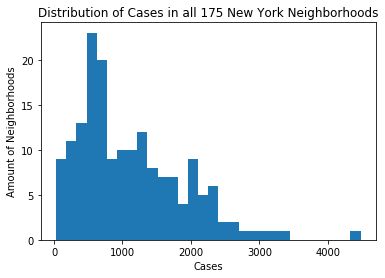

In [15]:
plt.hist(df['Cases'], bins = 30)
plt.xlabel('Cases')
plt.ylabel('Amount of Neighborhoods')
plt.title('Distribution of Cases in all 175 New York Neighborhoods')

Text(0.5, 1.0, 'Distribution of Deaths in all 175 NY neighborhoods')

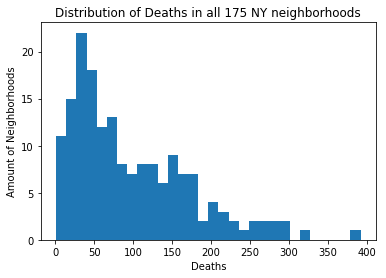

In [53]:
plt.hist(df['Deaths'], bins = 30)
plt.xlabel('Deaths')
plt.ylabel('Amount of Neighborhoods')
plt.title('Distribution of Deaths in all 175 NY neighborhoods')

Text(0.5, 1.0, 'Distribution of Cases by Borough using boxplot')

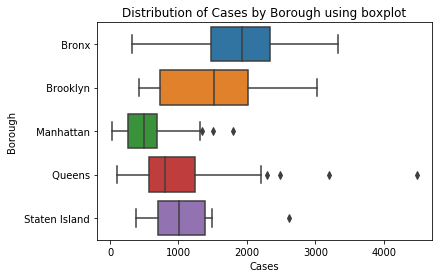

In [63]:
sns.boxplot(x = df['Cases'], y = df['Borough'])
plt.title('Distribution of Cases by Borough using boxplot')

Text(0.5, 1.0, 'Distributions of Deaths by Borough using boxplot')

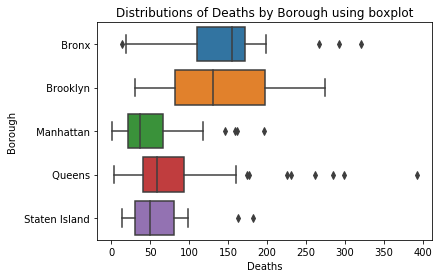

In [64]:
sns.boxplot(x = df['Deaths'], y = df['Borough'])
plt.title('Distributions of Deaths by Borough using boxplot')

In [40]:
agg_df = df.groupby('Borough').sum().reset_index()
agg_df

,Borough,Cases,Cases_per_100000,Deaths,Deaths_per_100000
0,Bronx,44365,75143,3560,5879
1,Brooklyn,53296,75222,5119,7508
2,Manhattan,23998,60311,2277,5530
3,Queens,60381,150239,5096,11880
4,Staten Island,13350,33846,826,1972


<BarContainer object of 5 artists>

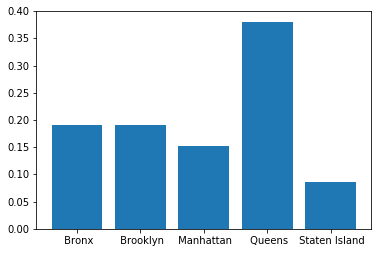

In [47]:
plt.bar(agg_df['Borough'],agg_df['Cases_per_100000']/agg_df['Cases_per_100000'].sum())

<BarContainer object of 5 artists>

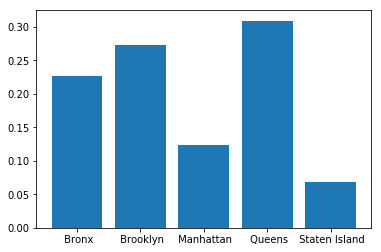

In [48]:
plt.bar(agg_df['Borough'],agg_df['Cases']/agg_df['Cases'].sum())

In [50]:
len(df)

173